# Insurance Claims- Fraud Detection

Automobile Claim Fraud Is Increases Day by Day.so for Industry or Company it is necessary to Predict first wheather this claim is 
Fraud or Not.it can be predict by Machine Learning.Its Very Diificult To Find Fraud as New Metod they are Finding Fraud.so with the 
help of Machine Learning company will identify the Fraud Claim and save the Money.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
table=[]

for i in df.columns:
    table.append([i,df[i].nunique(),df[i].drop_duplicates().values])
    
pd.DataFrame(table,columns=['features','Unique Number','Unique Values'])

,features,Unique Number,Unique Values
0,months_as_customer,391,"[328, 228, 134, 256, 137, 165, 27, 212, 235, 4..."
1,age,46,"[48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3..."
2,policy_number,1000,"[521585, 342868, 687698, 227811, 367455, 10459..."
3,policy_bind_date,951,"[17-10-2014, 27-06-2006, 06-09-2000, 25-05-199..."
4,policy_state,3,"[OH, IN, IL]"
5,policy_csl,3,"[250/500, 100/300, 500/1000]"
6,policy_deductable,3,"[1000, 2000, 500]"
7,policy_annual_premium,991,"[1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ..."
8,umbrella_limit,11,"[0, 5000000, 6000000, 4000000, 3000000, 800000..."
9,insured_zip,995,"[466132, 468176, 430632, 608117, 610706, 47845..."


Some Features Having Unwanted Data like ? ,We will replace in Data Preprocessing part.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print('length of categorical_features',len(categorical_features))
categorical_features

length of categorical_features 21


['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [6]:
numerical_features=[features for features in df.columns if df[features].dtype!='O']
print('Length of numerical features',len(numerical_features))
numerical_features

Length of numerical features 19


['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 '_c39']

In [7]:
continues_features=[features for features in df[numerical_features] if len(df[features].unique())>25]
print('Length of continues_features',len(continues_features))
continues_features

Length of continues_features 11


['months_as_customer',
 'age',
 'policy_number',
 'policy_annual_premium',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [8]:
discreat_features=[features for features in df[numerical_features] if len(df[features].unique())<25]
print('Length of discreat_features',len(discreat_features))
discreat_features

Length of discreat_features 8


['policy_deductable',
 'umbrella_limit',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'auto_year',
 '_c39']

In [9]:
year_features=[features for features in df[numerical_features] if "date" in features or 'year' in features]
print('Length Of year_features',len(year_features))
year_features

Length Of year_features 1


['auto_year']

# Visulization

Binary Visulization

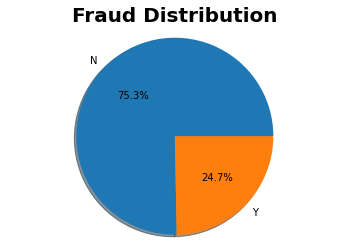

In [10]:
x=(df['fraud_reported']).value_counts()
plt.title('Fraud Distribution',fontdict={'fontweight':'bold','fontsize':20})
plt.pie(x,labels=x.index,shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# 24.70% Applicant find as fraud.which is very big and concern to company.

# Now We Take Policy Annual Premium is Income for the Company and Total Claim Amount is Expences or Outcome of the company and from that we check weather company is in PROFIT or in LOSS.

In [11]:
df['Profit/Loss']=((df['months_as_customer']/12)*(df['policy_annual_premium']))-(df['total_claim_amount'])
df['Profit/Loss'].values.sum()

-31396110.803333335

# Here Amount is in Negative so Company is in Loss.

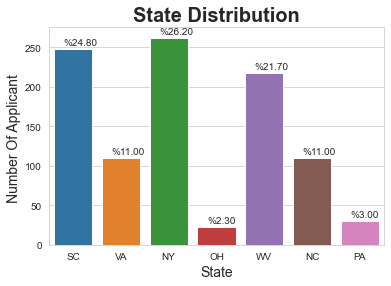

In [12]:
sns.set_style("whitegrid")
ax=sns.countplot(df['incident_state'])
plt.title('State Distribution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('State',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()+5))

Majority of the Applicant from the SC and NY state and OH & PA having very low applicant.

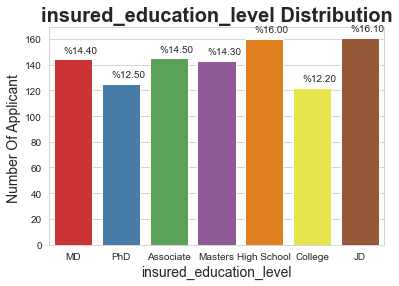

In [13]:
sns.set_style("whitegrid")
ax=sns.countplot(df['insured_education_level'],palette='Set1')
plt.title('insured_education_level Distribution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('insured_education_level',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()+5))

Text(0, 0.5, 'insured_occupation')

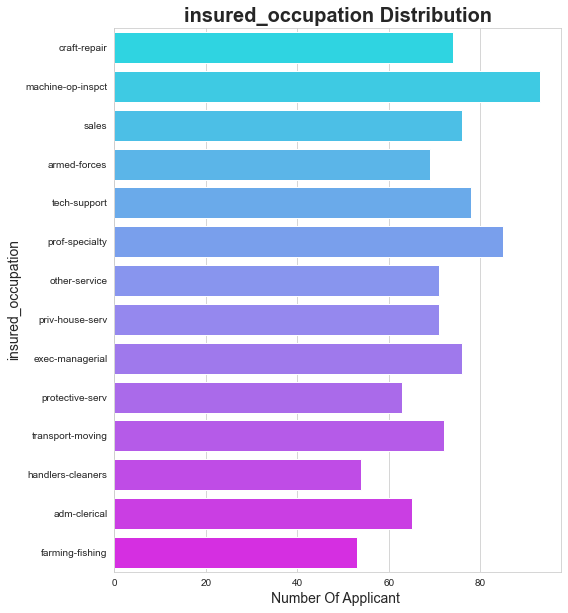

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,10))
ax=sns.countplot(y=df['insured_occupation'],palette='cool')
plt.title('insured_occupation Distribution',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel("Number Of Applicant ",fontsize=14)
plt.ylabel('insured_occupation',fontsize=14)

Text(0.5, 1.0, 'incident_severity Distribution')

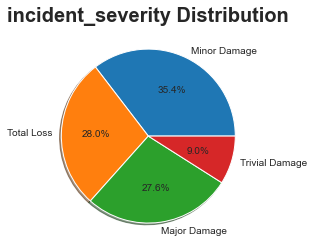

In [15]:
x=df['incident_severity'].value_counts()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%')
plt.title('incident_severity Distribution',fontdict={'fontweight':'bold','fontsize':20})

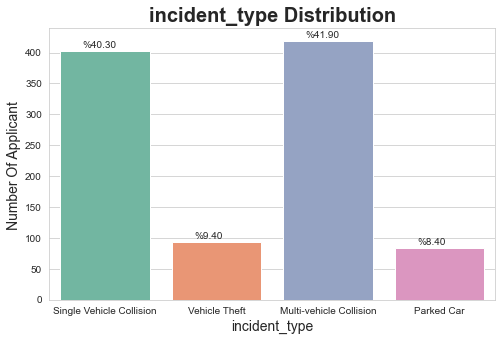

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax=sns.countplot(df['incident_type'],palette='Set2')
plt.title('incident_type Distribution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('incident_type',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()+5))

from this chart we can see that most of the claim are for vehicle vollision either its single or Multi vehical collision.

for vehical theft and parked card claim is less.

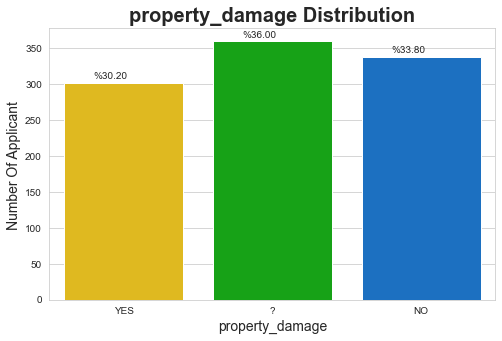

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax=sns.countplot(df['property_damage'],palette='nipy_spectral_r')
plt.title('property_damage Distribution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('property_damage',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()+5))

here some data are missing or unwanted so we will replace in Data Preprocessing.

Text(0.5, 0, 'auto_make')

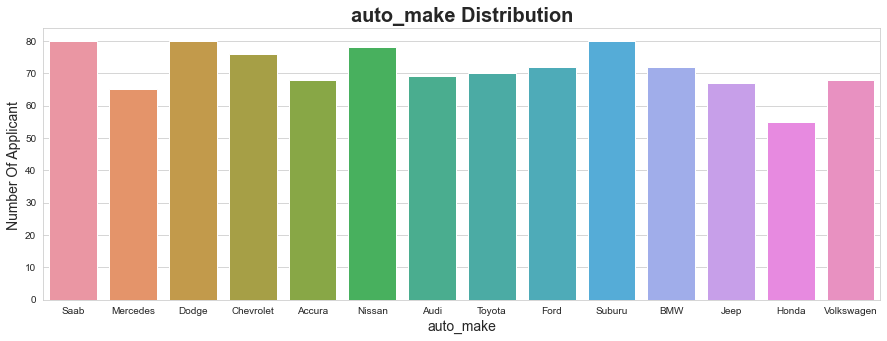

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax=sns.countplot(df['auto_make'])
plt.title('auto_make Distribution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('auto_make',fontsize=14)

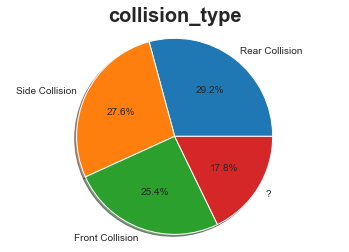

In [19]:
x=df['collision_type'].value_counts()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%')
plt.title('collision_type',fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

Here also some data are unwanted we will replace it in Data preprocessing part.

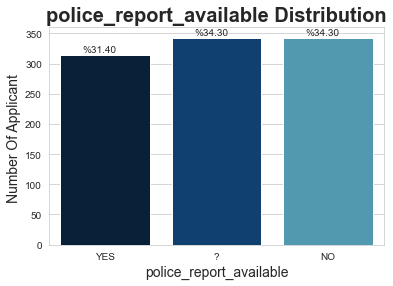

In [20]:
sns.set_style("whitegrid")
ax=sns.countplot(df['police_report_available'],palette='ocean')
plt.title('police_report_available Distribution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('police_report_available',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()+5))

here also some unwanted data is present we will handel it in data preprocessing part.

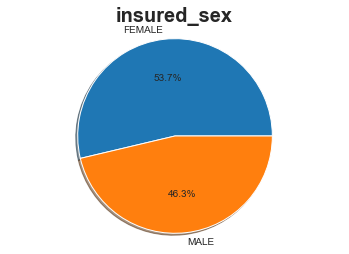

In [21]:
x=df['insured_sex'].value_counts()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%')
plt.title('insured_sex',fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

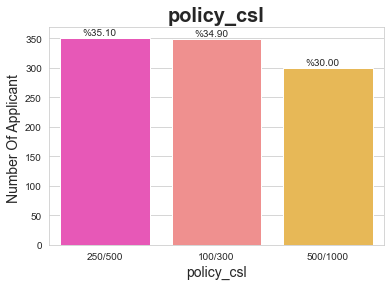

In [22]:
sns.set_style("whitegrid")
ax=sns.countplot(df['policy_csl'],palette='spring')
plt.title('policy_csl',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('policy_csl',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()+5))

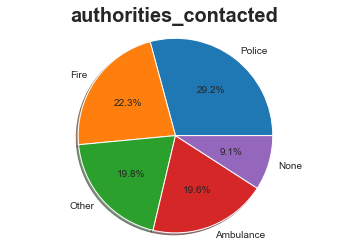

In [23]:
x=df['authorities_contacted'].value_counts()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%')
plt.title('authorities_contacted',fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

This show that 9.10% did not contact any autority after incident.and majority is contaced to the police 

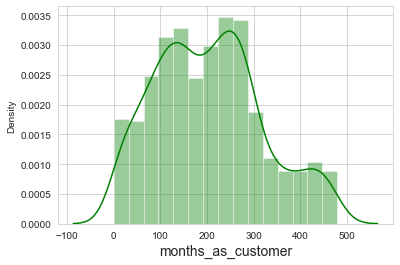

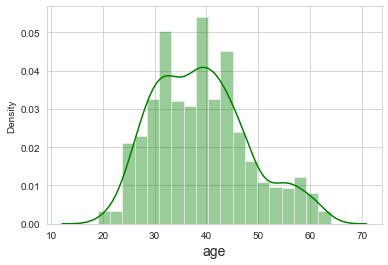

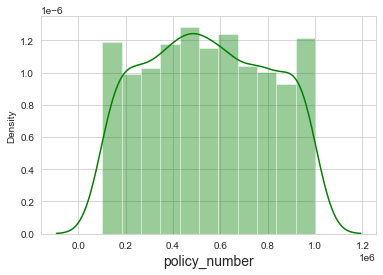

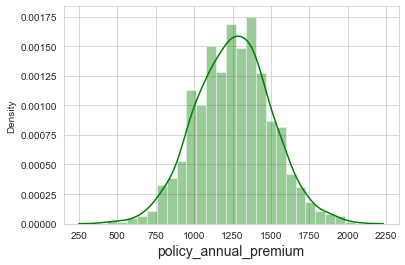

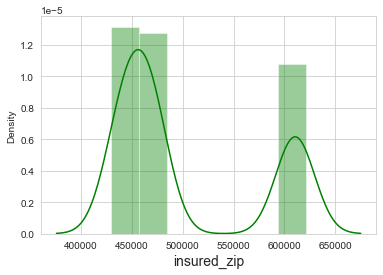

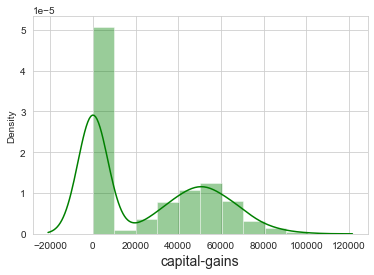

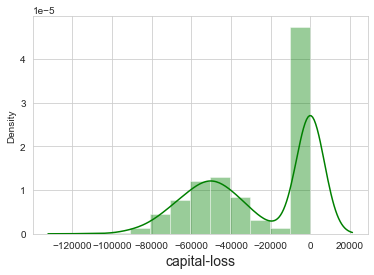

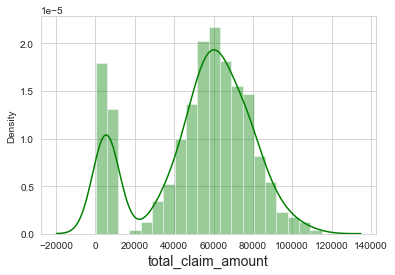

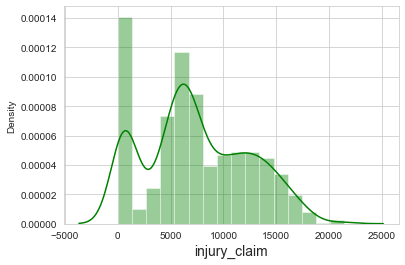

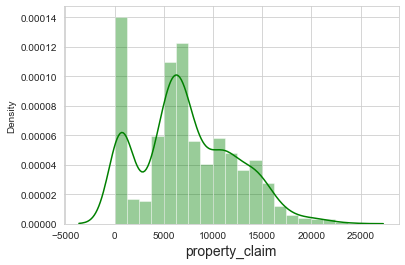

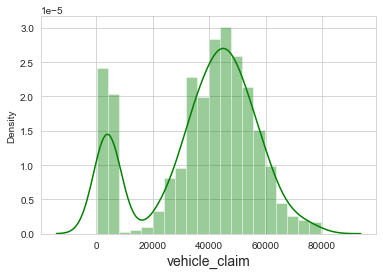

In [24]:
for i in continues_features:
    plt.figure()
    sns.distplot(df[i],color='green')
    plt.xlabel(i,fontsize=14)

Univeriant Analysis

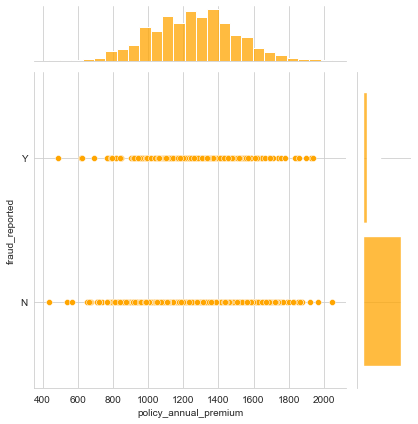

In [25]:
sns.jointplot(x=df['policy_annual_premium'],y=df['fraud_reported'],color='orange')

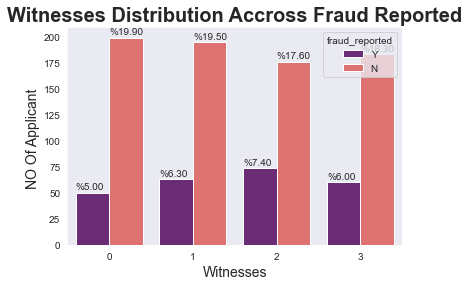

In [26]:
sns.set_style('dark')
ax=sns.countplot(x=df['witnesses'],hue=df['fraud_reported'],palette='magma')
plt.title('Witnesses Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("NO Of Applicant ",fontsize=14)
plt.xlabel('Witnesses',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x(),p.get_height()+3))

Whose having zero witness having less fraude and having 2 or 3 fraud having more fraud.

Text(0.5, 0, 'Incident_city')

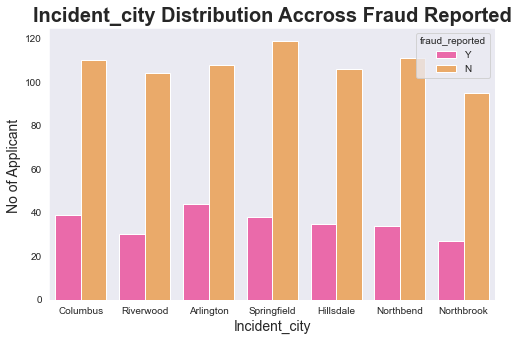

In [27]:
plt.figure(figsize=(8,5))
ax=sns.set_style('dark')
ax=sns.countplot(x=df['incident_city'],hue=df['fraud_reported'],palette='spring')
plt.title('Incident_city Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("No of Applicant ",fontsize=14)
plt.xlabel('Incident_city',fontsize=14)

fraud_reported   N   Y
auto_model            
3 Series        17   1
92x             20   8
93              20   5
95              22   5
A3              27  10
A5              21  11
Accord          10   3
C300            11   7
CRV             17   3
Camry           24   4
Civic           14   8
Corolla         17   3
E400            20   7
Escape          18   6
F150            17  10
Forrestor       20   8
Fusion          15   6
Grand Cherokee  19   6
Highlander      16   6
Impreza         14   6
Jetta           25  10
Legacy          27   5
M5              10   5
MDX             28   8
ML350           12   8
Malibu          27   3
Maxima          17   7
Neon            31   6
Passat          24   9
Pathfinder      27   4
RAM             29  14
RSX             11   1
Silverado       13   9
TL              16   4
Tahoe           15   9
Ultima          20   3
Wrangler        37   5
X5              16   7
X6               9   7


Text(0.5, 0, 'No Of Applicant')

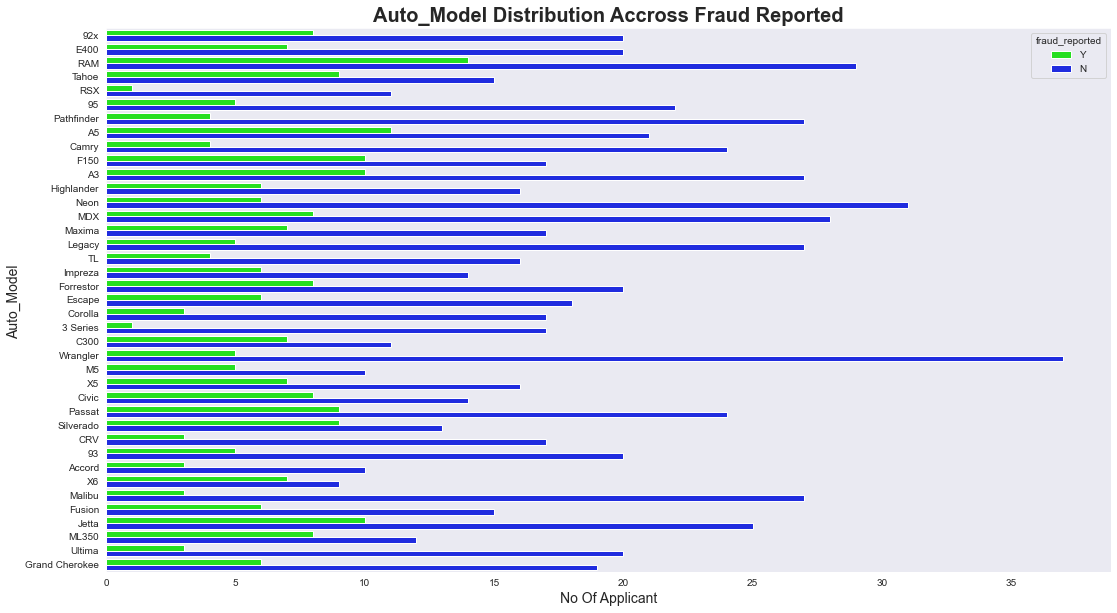

In [28]:
print(pd.crosstab(df['auto_model'],df['fraud_reported']))
plt.figure(figsize=(18,10))
ax=sns.set_style('dark')
ax=sns.countplot(y=df['auto_model'],hue=df['fraud_reported'],palette='hsv')
plt.title('Auto_Model Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Auto_Model ",fontsize=14)
plt.xlabel('No Of Applicant',fontsize=14)

Most of the Accident show in RAM,Neon,Jeeta.

RAM model having more Fraud and RSX having less Fraud claim.

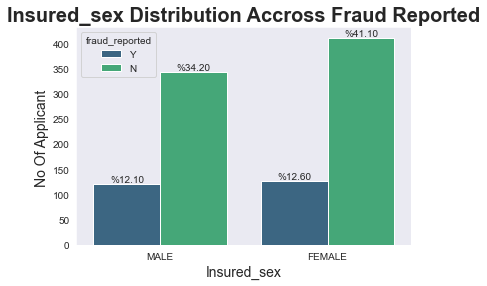

In [29]:
ax=sns.set_style('dark')
ax=sns.countplot(x=df['insured_sex'],hue=df['fraud_reported'],palette='viridis')
plt.title('Insured_sex Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("No Of Applicant ",fontsize=14)
plt.xlabel('Insured_sex',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.1, p.get_height()+4))

Fraud Find in Male is more as compair to Female Applicant because Female having more Applicant than Male.

Text(0.5, 0, 'policy_csl')

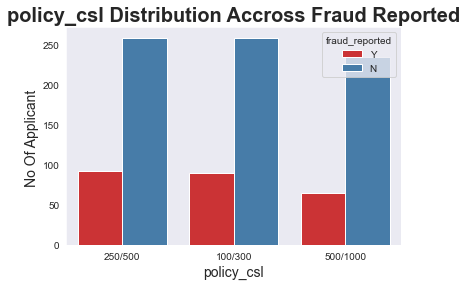

In [30]:
sns.set_style('dark')
ax=sns.countplot(x=df['policy_csl'],hue=df['fraud_reported'],palette='Set1')
plt.title('policy_csl Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("No Of Applicant ",fontsize=14)
plt.xlabel('policy_csl',fontsize=14)

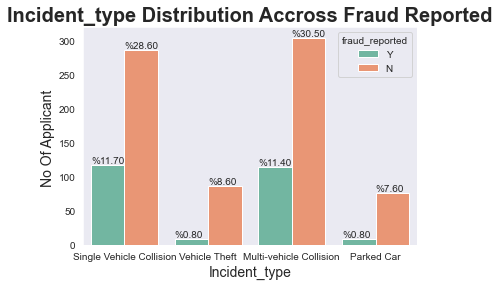

In [31]:
sns.set_style('dark')
ax=sns.countplot(x=df['incident_type'],hue=df['fraud_reported'],palette='Set2')
plt.title('Incident_type Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("No Of Applicant ",fontsize=14)
plt.xlabel('Incident_type',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x(), p.get_height()+3))

fraud_reported       N   Y
insured_occupation        
adm-clerical        54  11
armed-forces        52  17
craft-repair        52  22
exec-managerial     48  28
farming-fishing     37  16
handlers-cleaners   43  11
machine-op-inspct   71  22
other-service       59  12
priv-house-serv     59  12
prof-specialty      67  18
protective-serv     49  14
sales               55  21
tech-support        56  22
transport-moving    51  21


Text(0.5, 0, 'Insured_education_level')

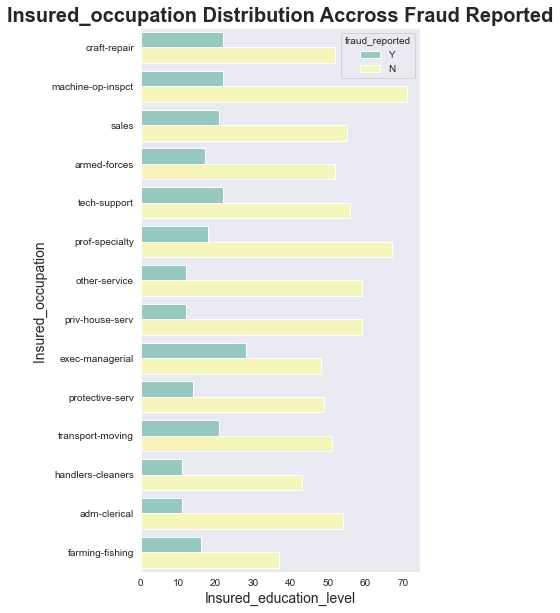

In [32]:
print(pd.crosstab(df['insured_occupation'],df['fraud_reported']))

plt.figure(figsize=(5,10))
sns.set_style('dark')
ax=sns.countplot(y=df['insured_occupation'],hue=df['fraud_reported'],palette='Set3')
plt.title('Insured_occupation Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Insured_occupation ",fontsize=14)
plt.xlabel('Insured_education_level',fontsize=14)

# This chart indicated Ex-Managerial having higher Tendency of Fraud and handlers-cleaners having less Tendacyof  fraud.This is very shocking Observation.

as highly educated & at higher post becomes fruad and less educated having less fraud.

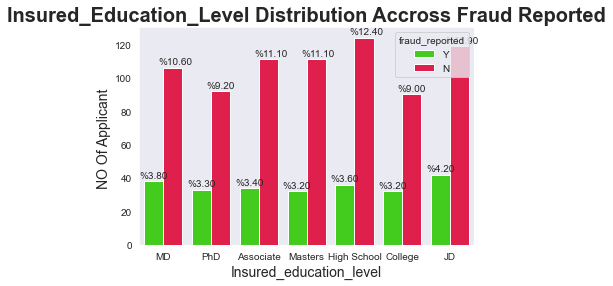

In [33]:
sns.set_style('dark')
ax=sns.countplot(x=df['insured_education_level'],hue=df['fraud_reported'],palette='prism')
plt.title('Insured_Education_Level Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("NO Of Applicant ",fontsize=14)
plt.xlabel('Insured_education_level',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()-0.1, p.get_height()+2))

Fraud found in all level of Education 

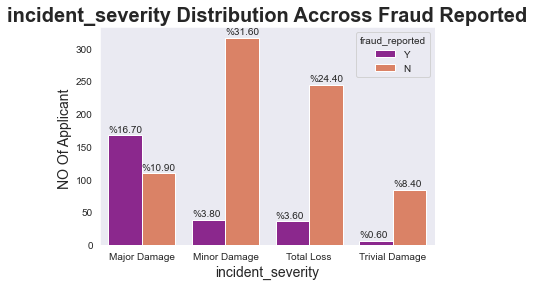

In [34]:
sns.set_style('dark')
ax=sns.countplot(x=df['incident_severity'],hue=df['fraud_reported'],palette='plasma')
plt.title('incident_severity Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("NO Of Applicant ",fontsize=14)
plt.xlabel('incident_severity',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x(), p.get_height()+5))

From This chart we say that Major damage severity having more Fraud so that we should check accros the claim amout too.their may
be possible whose claim for higher amount they have fraud too.

Text(0.5, 0, 'fraud_reported')

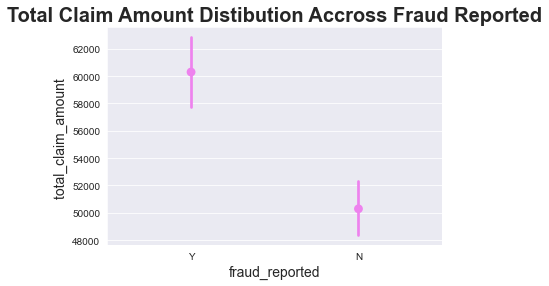

In [35]:
sns.set_style('darkgrid')
sns.pointplot(y=df['total_claim_amount'],x=df['fraud_reported'],join=False,color='violet')
plt.title('Total Claim Amount Distibution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("total_claim_amount ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

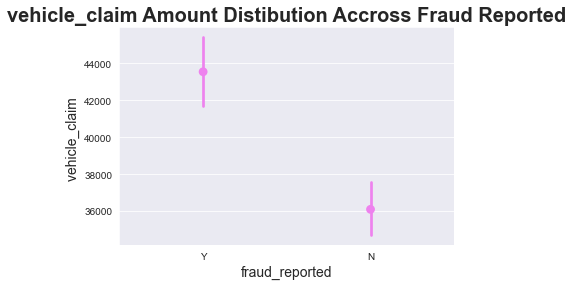

In [36]:
sns.set_style('darkgrid')
sns.pointplot(y=df['vehicle_claim'],x=df['fraud_reported'],join=False,color='violet')
plt.title('vehicle_claim Amount Distibution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("vehicle_claim ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

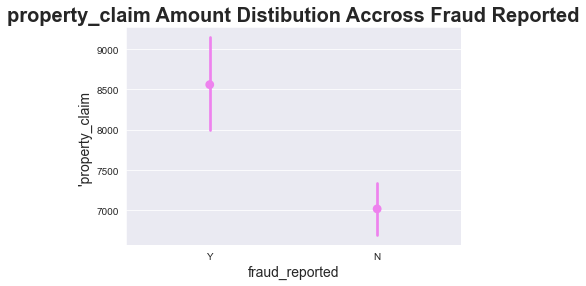

In [37]:
sns.set_style('darkgrid')
sns.pointplot(y=df['property_claim'],x=df['fraud_reported'],join=False,color='violet')
plt.title('property_claim Amount Distibution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("'property_claim ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

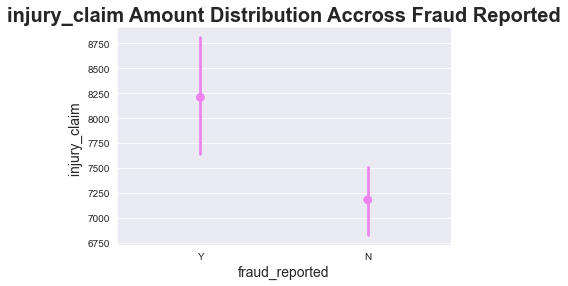

In [38]:
sns.set_style('darkgrid')
sns.pointplot(y=df['injury_claim'],x=df['fraud_reported'],join=False,color='violet')
plt.title('injury_claim Amount Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("injury_claim ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

# Data Preprocessing

In [39]:
#collision_type
#'police_report_available
#property_damage

In [40]:
df['collision_type']=df['collision_type'].replace('?',np.nan)
df['police_report_available']=df['police_report_available'].replace('?',np.nan)
df['property_damage']=df['property_damage'].replace('?',np.nan)

In [41]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [42]:
nan=['police_report_available','property_damage','collision_type']

In [43]:
for i in nan:
    df[i].fillna(df[i].mode()[0],inplace=True)

# Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
lb=LabelEncoder()

In [46]:
for i in categorical_features:
    df[i]=lb.fit_transform(df[i])

In [47]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Profit/Loss
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,71610,6510,13020,52080,10,1,2004,1,NaN,-33154.460000
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,5070,780,780,3510,8,12,2007,1,NaN,17677.180000
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,4,30,2007,0,NaN,-18869.936667
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,3,34,2014,1,NaN,-33197.546667
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,6500,1300,650,4550,0,31,2009,0,NaN,23594.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,87200,17440,8720,61040,6,6,2006,0,NaN,-86872.300000
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,108480,18080,18080,72320,13,28,2015,0,NaN,-74356.237500
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,67500,7500,7500,52500,11,19,1996,0,NaN,-52512.191667
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,46980,5220,5220,36540,1,5,1998,0,NaN,4809.113333


# Statastical

In [48]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Profit/Loss
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,NaN,-31396.110803
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,NaN,28609.096730
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,NaN,-98696.934167
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,NaN,-52518.001667
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,NaN,-35353.536250
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,NaN,-14471.937292
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,NaN,48515.443333


# Co Relation

In [49]:
corr=df.corr()

Text(0.5, 1.0, 'Co Relation')

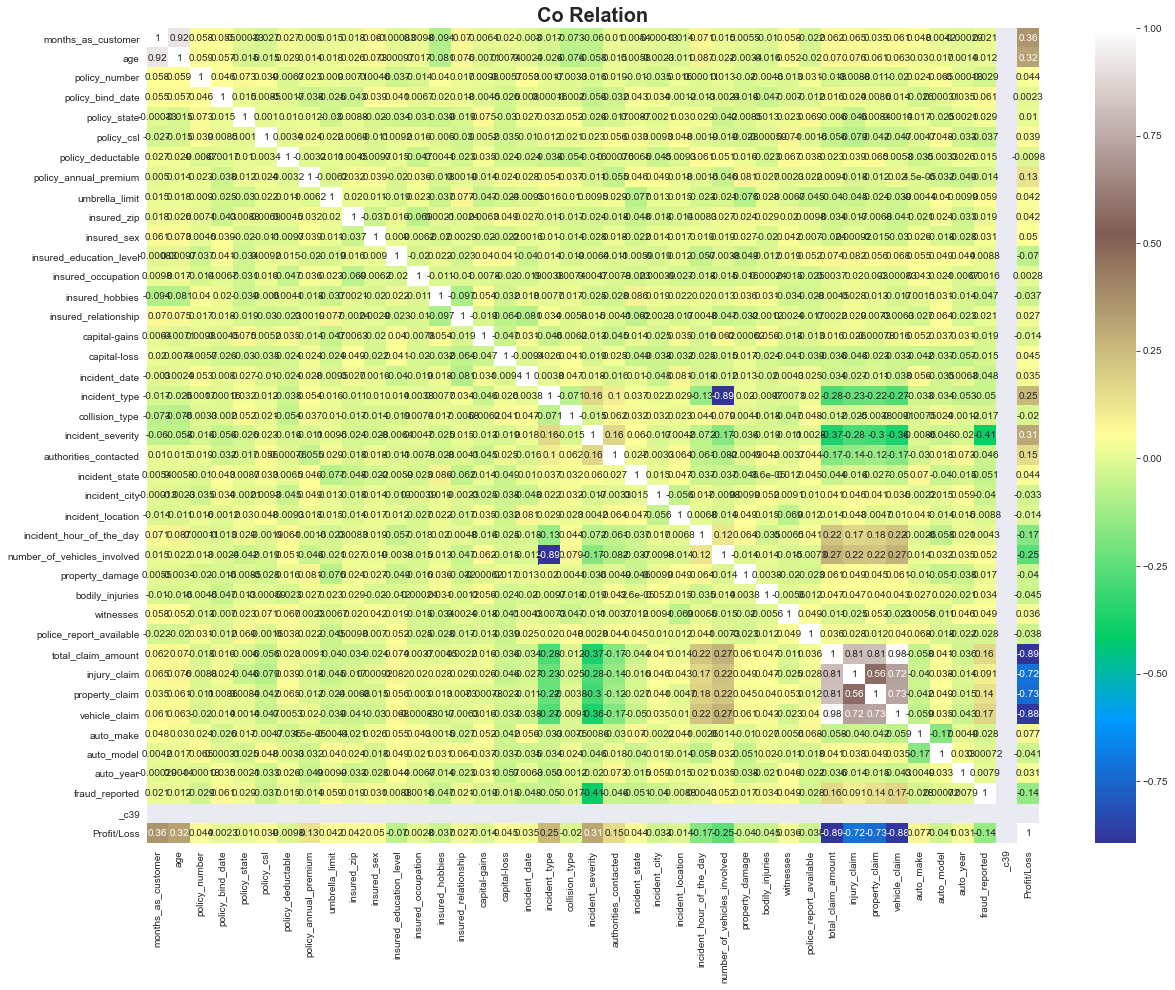

In [50]:
plt.figure(figsize=(20,15))
sns.heatmap(data=corr,annot=True,cmap='terrain')
plt.title("Co Relation",fontdict={'fontweight':'bold','fontsize':20})

In [51]:
df.drop('_c39',inplace=True,axis=1)

In [52]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Profit/Loss
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,71610,6510,13020,52080,10,1,2004,1,-33154.460000
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,2007,1,17677.180000
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,0,34650,7700,3850,23100,4,30,2007,0,-18869.936667
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,0,63400,6340,6340,50720,3,34,2014,1,-33197.546667
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,6500,1300,650,4550,0,31,2009,0,23594.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,0,87200,17440,8720,61040,6,6,2006,0,-86872.300000
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,0,108480,18080,18080,72320,13,28,2015,0,-74356.237500
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,1,67500,7500,7500,52500,11,19,1996,0,-52512.191667
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,46980,5220,5220,36540,1,5,1998,0,4809.113333


# Data Cleaning

In [53]:
df.drop(['Profit/Loss','incident_hour_of_the_day','number_of_vehicles_involved','policy_number','policy_bind_date','incident_date','incident_location','insured_zip'],axis=1)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,0,0,1000,1436.79,0,0,6,9,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,1,1,46980,5220,5220,36540,1,5,1998,0


In [54]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'Profit/Loss'],
      dtype='object')

In [55]:
from scipy.stats import zscore

In [56]:
z=np.abs(zscore(df))

In [57]:
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8], dtype=int64))


In [58]:
df_new=df[(z<3).all(axis=1)]

In [59]:
df_new.shape

(980, 40)

In [60]:
df.shape

(1000, 40)

In [61]:
dataloss=(1000-979)/1000*100
dataloss

2.1

In [62]:
df=df_new

In [63]:
df[continues_features].skew()

months_as_customer       0.362608
age                      0.475385
policy_number            0.036283
policy_annual_premium    0.035964
insured_zip              0.837283
capital-gains            0.466619
capital-loss            -0.376884
total_claim_amount      -0.593593
injury_claim             0.271759
property_claim           0.361356
vehicle_claim           -0.620936
dtype: float64

No too much skewness is present in dataset.

In [64]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [65]:
from sklearn.preprocessing import power_transform

In [66]:
x1=power_transform(x,method='yeo-johnson')
x1=pd.DataFrame(x1)

In [67]:
x=x1

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
std=StandardScaler()

In [70]:
X=std.fit_transform(x)

In [71]:
x=X

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [73]:
from sklearn.linear_model import LogisticRegression

# Random State Selection

In [74]:
lg=LogisticRegression()

In [75]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 80 score is well
test score 80.10204081632652
train score 80.10204081632652


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=80)

In [77]:
y_train.shape

(784,)

In [78]:
y_train.value_counts()

0    585
1    199
Name: fraud_reported, dtype: int64

# SMOTE

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x_train,y_train)

In [81]:
trainy.value_counts()

1    585
0    585
Name: fraud_reported, dtype: int64

In [82]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [83]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [84]:
def fun(f):
    f.fit(trainx,trainy)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

In [85]:
fun(lg)

Accuracy Score 73.46938775510205
Confusion Matrix
 [[111  44]
 [  8  33]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.72      0.81       155
           1       0.43      0.80      0.56        41

    accuracy                           0.73       196
   macro avg       0.68      0.76      0.68       196
weighted avg       0.83      0.73      0.76       196

F1 score 55.932203389830505


In [86]:
fun(svc)

Accuracy Score 77.55102040816327
Confusion Matrix
 [[129  26]
 [ 18  23]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       155
           1       0.47      0.56      0.51        41

    accuracy                           0.78       196
   macro avg       0.67      0.70      0.68       196
weighted avg       0.79      0.78      0.78       196

F1 score 51.11111111111111


In [87]:
fun(dtc)

Accuracy Score 76.0204081632653
Confusion Matrix
 [[123  32]
 [ 15  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       155
           1       0.45      0.63      0.53        41

    accuracy                           0.76       196
   macro avg       0.67      0.71      0.68       196
weighted avg       0.80      0.76      0.77       196

F1 score 52.52525252525253


In [88]:
fun(knn)

Accuracy Score 47.44897959183674
Confusion Matrix
 [[60 95]
 [ 8 33]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.39      0.54       155
           1       0.26      0.80      0.39        41

    accuracy                           0.47       196
   macro avg       0.57      0.60      0.46       196
weighted avg       0.75      0.47      0.51       196

F1 score 39.053254437869825


In [89]:
fun(gb)

Accuracy Score 57.6530612244898
Confusion Matrix
 [[80 75]
 [ 8 33]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.52      0.66       155
           1       0.31      0.80      0.44        41

    accuracy                           0.58       196
   macro avg       0.61      0.66      0.55       196
weighted avg       0.78      0.58      0.61       196

F1 score 44.29530201342282


# Ensemble Method

In [90]:
#!pip install xgboost

In [91]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBRFClassifier

In [92]:
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()
xgb=XGBClassifier()
sgd=SGDClassifier()
xgbr=XGBRFClassifier()

In [93]:
fun(rfc)

Accuracy Score 81.63265306122449
Confusion Matrix
 [[133  22]
 [ 14  27]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       155
           1       0.55      0.66      0.60        41

    accuracy                           0.82       196
   macro avg       0.73      0.76      0.74       196
weighted avg       0.83      0.82      0.82       196

F1 score 60.0


In [94]:
fun(ad)

Accuracy Score 81.63265306122449
Confusion Matrix
 [[134  21]
 [ 15  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       155
           1       0.55      0.63      0.59        41

    accuracy                           0.82       196
   macro avg       0.73      0.75      0.74       196
weighted avg       0.83      0.82      0.82       196

F1 score 59.09090909090909


In [95]:
fun(gd)

Accuracy Score 82.6530612244898
Confusion Matrix
 [[132  23]
 [ 11  30]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.85      0.89       155
           1       0.57      0.73      0.64        41

    accuracy                           0.83       196
   macro avg       0.74      0.79      0.76       196
weighted avg       0.85      0.83      0.83       196

F1 score 63.82978723404255


In [96]:
#!pip install --upgrade xgboost

In [97]:
fun(xgb)

[15:00:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 85.20408163265306
Confusion Matrix
 [[136  19]
 [ 10  31]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       155
           1       0.62      0.76      0.68        41

    accuracy                           0.85       196
   macro avg       0.78      0.82      0.79       196
weighted avg       0.87      0.85      0.86       196

F1 score 68.13186813186813


In [98]:
fun(sgd)

Accuracy Score 73.46938775510205
Confusion Matrix
 [[113  42]
 [ 10  31]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.73      0.81       155
           1       0.42      0.76      0.54        41

    accuracy                           0.73       196
   macro avg       0.67      0.74      0.68       196
weighted avg       0.82      0.73      0.76       196

F1 score 54.385964912280706


In [99]:
fun(xgbr)

[15:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 85.71428571428571
Confusion Matrix
 [[132  23]
 [  5  36]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       155
           1       0.61      0.88      0.72        41

    accuracy                           0.86       196
   macro avg       0.79      0.86      0.81       196
weighted avg       0.89      0.86      0.87       196

F1 score 72.00000000000001


# Hyper Tunning

In [100]:
from sklearn.model_selection import GridSearchCV

RandomForest Classifier

In [223]:
p1={'n_estimators':[10,50,75,100,250],'max_depth':[7,8,9,10,11,6],'max_features':['auto','log','sqrt'],'random_state':[11,25,36,58,100]}
gd1=GridSearchCV(rfc,p1)
gd1.fit(trainx,trainy)
print(gd1.best_params_)

{'max_depth': 9, 'max_features': 'auto', 'n_estimators': 250, 'random_state': 25}


In [101]:
rfc1=RandomForestClassifier(max_depth=1,max_features='auto',n_estimators=250,random_state=80)

In [102]:
fun(rfc1)

Accuracy Score 83.6734693877551
Confusion Matrix
 [[130  25]
 [  7  34]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       155
           1       0.58      0.83      0.68        41

    accuracy                           0.84       196
   macro avg       0.76      0.83      0.79       196
weighted avg       0.87      0.84      0.85       196

F1 score 68.0


GradientBoosting Classifier

In [226]:
p3={'loss':['deviance','exponential'],'learning_rate':[0.1,0.01,0.001],'n_estimators':[10,100,150,250],'min_samples_leaf':[0,1,2],'max_depth':[3,5,6,7,8,9,10]}

gd3=GridSearchCV(gd,p3)
gd3.fit(trainx,trainy)
print(gd3.best_params_)

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 150}


In [103]:
gd1=GradientBoostingClassifier(learning_rate=0.01,max_depth=3,n_estimators=150,min_samples_leaf=2)

In [104]:
fun(gd1)

Accuracy Score 86.22448979591837
Confusion Matrix
 [[130  25]
 [  2  39]]
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.84      0.91       155
           1       0.61      0.95      0.74        41

    accuracy                           0.86       196
   macro avg       0.80      0.89      0.82       196
weighted avg       0.91      0.86      0.87       196

F1 score 74.28571428571428


# Cross Validation

In [242]:
from sklearn.model_selection import cross_val_score

In [243]:
for i in range(2,16):
    score=cross_val_score(rfc1,trainx,trainy,cv=i)
    print("score at cv=",i,score.mean()*100)

score at cv= 2 84.87179487179488
score at cv= 3 85.8974358974359
score at cv= 4 86.16461732666323
score at cv= 5 87.77777777777777
score at cv= 6 86.66666666666667
score at cv= 7 87.5325878854536
score at cv= 8 87.36778958158605
score at cv= 9 86.83760683760684
score at cv= 10 87.94871794871796
score at cv= 11 87.55310110450299
score at cv= 12 88.23462374640579
score at cv= 13 87.09401709401709
score at cv= 14 87.8893123514466
score at cv= 15 87.94871794871796


In [244]:
for i in range(2,16):
    score=cross_val_score(gd1,trainx,trainy,cv=i)
    print("score at cv=",i,score.mean()*100)

score at cv= 2 86.4957264957265
score at cv= 3 85.81196581196582
score at cv= 4 86.15468231333864
score at cv= 5 86.23931623931624
score at cv= 6 86.4957264957265
score at cv= 7 86.24078373864516
score at cv= 8 86.24021526418787
score at cv= 9 86.4957264957265
score at cv= 10 86.23931623931625
score at cv= 11 86.24420897388629
score at cv= 12 86.41121397012414
score at cv= 13 86.58119658119661
score at cv= 14 86.49495942955495
score at cv= 15 86.58119658119661


# AUC ROC CURVE

In [105]:
from sklearn.metrics import roc_curve,roc_auc_score

In [106]:
y_pred_prob=gd1.predict_proba(x_test)[:,1]

In [107]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,gd1.predict(x_test)))

ROC Score 0.8949645948072383


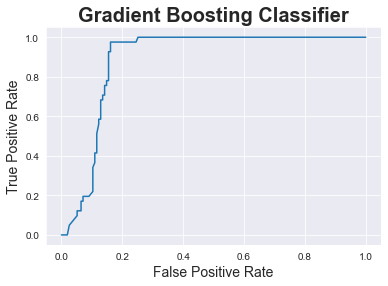

In [108]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('Gradient Boosting Classifier',fontdict={'fontweight':'bold','fontsize':20})
plt.show()

# Saving Model

In [109]:
import pickle
filename='Frau_Detection_Prediction.pkl'
pickle.dump(gd1,open(filename,'wb'))

# Conclusion

In [110]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=gd1.predict(x_test)

print(res)

     Actual  Predict
292       1        1
418       0        0
655       0        1
265       0        0
697       0        1
..      ...      ...
198       0        1
176       0        0
313       0        0
858       0        0
261       1        1

[196 rows x 2 columns]


# Summary:)
    
1) From Model we get 95% Recall which means Model identify 95% Correctly Precidiced for Fraud.

2) Model Give 84% for Non Fraud Prediction and out of 98& pricition.

3) Overall Accuracy Score is 86